# Auto ML алгоритмы для сезонных timescale данных

Рассмотрим датасет с потреблением электричества. Имеем колонку даты (*DATE*) и колонку с величиной потребления электричества (*IPG2211A2N*).

## Импортируем библиотеки

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pycaret
from pycaret.time_series import *
from pycaret.time_series import TSForecastingExperiment

## Загрузим датасет и проведем EDA

In [ ]:
# загрузка данных
# index_col="time" (колонка индекс)
# parse_dates= True
df= pd.read_csv(
    "electric-production.csv",
    index_col="DATE", parse_dates=True
    ) #datetime

df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [ ]:
df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [ ]:
df.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)

In [ ]:
# Проверка распределения даты по порядку
df.index.is_monotonic_increasing

True

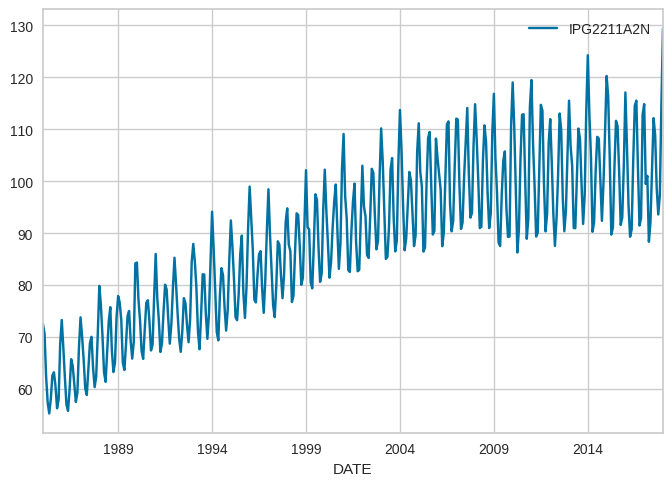

In [ ]:
df.plot();

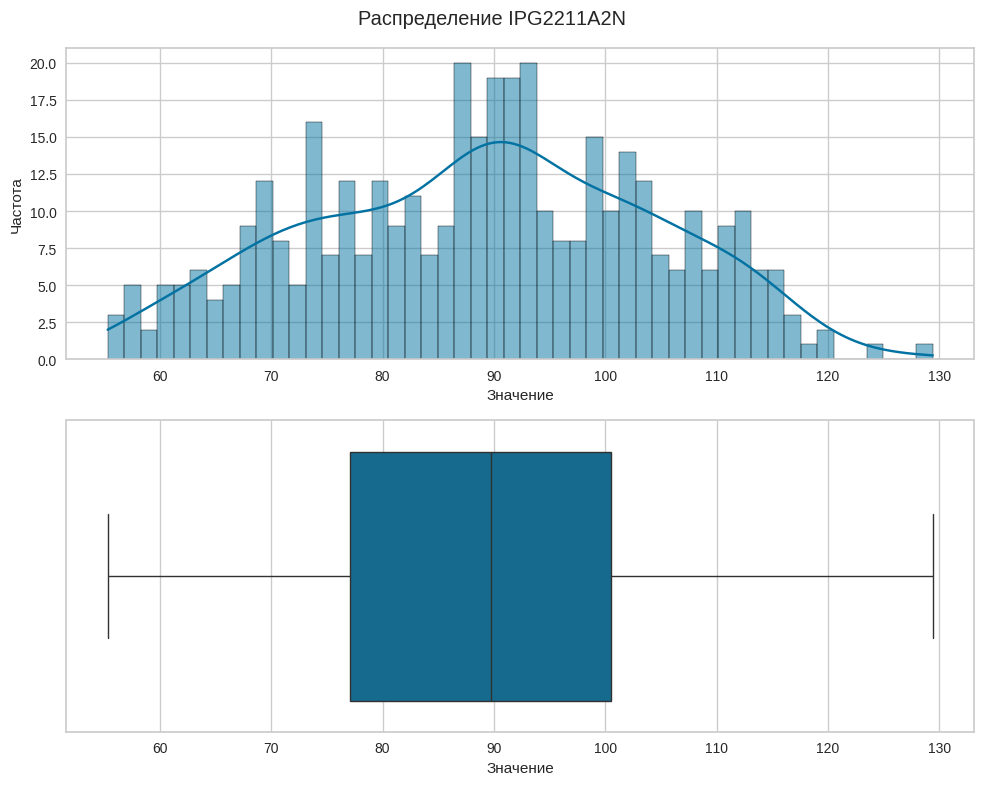

In [ ]:
# Распределение показателей потребления электричества
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(df['IPG2211A2N'], bins=50, kde=True, ax=ax[0])
ax[0].set_xlabel("Значение")
ax[0].set_ylabel("Частота")

sns.boxplot(df['IPG2211A2N'], orient="h", ax=ax[1])
ax[1].set_xlabel("Значение")
ax[1].set_yticks([])

plt.suptitle("Распределение IPG2211A2N")
plt.tight_layout()
plt.show()

**Вывод: данные в хорошем состоянии, пропусков в данных нет, выбросов тоже нет. Дата вынесена в индекс датасета. Данные представлены с января 1985 года по январь 2018 года (всего 33 года).**

## Используем AutoML Pycaret

In [ ]:
# fh = 3 - 3 периода вперед
s = setup(df, fh = 3, session_id = 42)

,Description,Value
0,session_id,42
1,Target,IPG2211A2N
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(397, 1)"
5,Transformed data shape,"(397, 1)"
6,Transformed train set shape,"(394, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
exp = TSForecastingExperiment()
exp.setup(df, fh = 3, session_id = 42)

,Description,Value
0,session_id,42
1,Target,IPG2211A2N
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(397, 1)"
5,Transformed data shape,"(397, 1)"
6,Transformed train set shape,"(394, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,397.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,88.847218
3,Summary,Statistics,Transformed,Median,,89.7795
4,Summary,Statistics,Transformed,Standard Deviation,,15.387834
5,Summary,Statistics,Transformed,Variance,,236.785425
6,Summary,Statistics,Transformed,Kurtosis,,-0.694201
7,Summary,Statistics,Transformed,Skewness,,-0.073096
8,Summary,Statistics,Transformed,# Distinct Values,,397.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",4673.514604


In [ ]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.7867,0.7839,2.2082,2.8004,0.0225,0.0220,0.6621,0.1767
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.7883,0.7802,2.2131,2.7873,0.0225,0.0220,0.6773,0.1700
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.7884,0.7802,2.2131,2.7872,0.0225,0.0220,0.6774,0.3933
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.8146,0.7779,2.2864,2.7788,0.0230,0.0225,0.6941,0.4267
auto_arima,Auto ARIMA,0.8397,0.7515,2.3575,2.6853,0.0238,0.0235,0.7443,148.0967
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8521,0.8365,2.3923,2.9887,0.0242,0.0237,0.6527,0.2833
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.8543,0.8764,2.3990,3.1324,0.0242,0.0237,0.6969,0.3767
exp_smooth,Exponential Smoothing,0.8687,0.8465,2.4388,3.0244,0.0246,0.0243,0.6448,1.7600
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8806,0.8367,2.4708,2.9882,0.0252,0.0245,0.5847,0.1733
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.8979,0.8087,2.5202,2.8891,0.0254,0.0249,0.6780,0.6000


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

### Графики и сохранение лучшей модели

In [ ]:
plot_model(best, plot = 'forecast')

In [ ]:
# Предсказание на 36 месяцев вперед
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 36})

In [ ]:
# Значение метрик качества модели
holdout_pred = predict_model(best)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,BayesianRidge,2.1309,2.1728,6.0125,7.7898,0.0487,0.0506,0.6468


In [ ]:
# Значение первых 3 предсказаний
holdout_pred.head()

,y_pred
2017-11,98.2250
2017-12,110.2836
2018-01,116.6941


In [ ]:
# Сохранение лучшей модели
save_model(best, 'timeseries_best_pycaret')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12,
                                                                                                                                         11,
                                                                                                                                         10,
                                                                                                                                         9,
                                                                                                                                         8,
                                                                                                                                         7,
                                        

## Генерация признаков tsfresh

In [ ]:
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from tsfresh.feature_extraction import extract_features
from tsfresh import select_features
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
# Загрузка и подготовка данных
df = pd.read_csv("electric-production.csv")
df["DATE"] = pd.to_datetime(df["DATE"])
df.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        397 non-null    datetime64[ns]
 1   IPG2211A2N  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [ ]:
# Генерируем id по порядку
df['id'] = range(0, len(df))
df.head()

,DATE,IPG2211A2N,id
0,1985-01-01,72.5052,0
1,1985-02-01,70.6720,1
2,1985-03-01,62.4502,2
3,1985-04-01,57.4714,3
4,1985-05-01,55.3151,4


In [ ]:
# Генерация признаков
X = extract_features(df,
                     column_id='id',
                     column_sort='DATE',
                     column_value='IPG2211A2N')
X.head()

Feature Extraction: 100%|██████████| 397/397 [00:11<00:00, 33.33it/s]


,IPG2211A2N__variance_larger_than_standard_deviation,IPG2211A2N__has_duplicate_max,IPG2211A2N__has_duplicate_min,IPG2211A2N__has_duplicate,IPG2211A2N__sum_values,IPG2211A2N__abs_energy,IPG2211A2N__mean_abs_change,IPG2211A2N__mean_change,IPG2211A2N__mean_second_derivative_central,IPG2211A2N__median,...,IPG2211A2N__fourier_entropy__bins_5,IPG2211A2N__fourier_entropy__bins_10,IPG2211A2N__fourier_entropy__bins_100,IPG2211A2N__permutation_entropy__dimension_3__tau_1,IPG2211A2N__permutation_entropy__dimension_4__tau_1,IPG2211A2N__permutation_entropy__dimension_5__tau_1,IPG2211A2N__permutation_entropy__dimension_6__tau_1,IPG2211A2N__permutation_entropy__dimension_7__tau_1,IPG2211A2N__query_similarity_count__query_None__threshold_0.0,IPG2211A2N__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,0.0,72.5052,5257.004027,NaN,NaN,NaN,72.5052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,70.6720,4994.531584,NaN,NaN,NaN,70.6720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,62.4502,3900.027480,NaN,NaN,NaN,62.4502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,57.4714,3302.961818,NaN,NaN,NaN,57.4714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,55.3151,3059.760288,NaN,NaN,NaN,55.3151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
impute(X) # заполнение NaN
X.head()

,IPG2211A2N__variance_larger_than_standard_deviation,IPG2211A2N__has_duplicate_max,IPG2211A2N__has_duplicate_min,IPG2211A2N__has_duplicate,IPG2211A2N__sum_values,IPG2211A2N__abs_energy,IPG2211A2N__mean_abs_change,IPG2211A2N__mean_change,IPG2211A2N__mean_second_derivative_central,IPG2211A2N__median,...,IPG2211A2N__fourier_entropy__bins_5,IPG2211A2N__fourier_entropy__bins_10,IPG2211A2N__fourier_entropy__bins_100,IPG2211A2N__permutation_entropy__dimension_3__tau_1,IPG2211A2N__permutation_entropy__dimension_4__tau_1,IPG2211A2N__permutation_entropy__dimension_5__tau_1,IPG2211A2N__permutation_entropy__dimension_6__tau_1,IPG2211A2N__permutation_entropy__dimension_7__tau_1,IPG2211A2N__query_similarity_count__query_None__threshold_0.0,IPG2211A2N__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,0.0,72.5052,5257.004027,0.0,0.0,0.0,72.5052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,70.6720,4994.531584,0.0,0.0,0.0,70.6720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,62.4502,3900.027480,0.0,0.0,0.0,62.4502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,57.4714,3302.961818,0.0,0.0,0.0,57.4714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,55.3151,3059.760288,0.0,0.0,0.0,55.3151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.columns

Index(['IPG2211A2N__variance_larger_than_standard_deviation',
       'IPG2211A2N__has_duplicate_max', 'IPG2211A2N__has_duplicate_min',
       'IPG2211A2N__has_duplicate', 'IPG2211A2N__sum_values',
       'IPG2211A2N__abs_energy', 'IPG2211A2N__mean_abs_change',
       'IPG2211A2N__mean_change', 'IPG2211A2N__mean_second_derivative_central',
       'IPG2211A2N__median',
       ...
       'IPG2211A2N__fourier_entropy__bins_5',
       'IPG2211A2N__fourier_entropy__bins_10',
       'IPG2211A2N__fourier_entropy__bins_100',
       'IPG2211A2N__permutation_entropy__dimension_3__tau_1',
       'IPG2211A2N__permutation_entropy__dimension_4__tau_1',
       'IPG2211A2N__permutation_entropy__dimension_5__tau_1',
       'IPG2211A2N__permutation_entropy__dimension_6__tau_1',
       'IPG2211A2N__permutation_entropy__dimension_7__tau_1',
       'IPG2211A2N__query_similarity_count__query_None__threshold_0.0',
       'IPG2211A2N__mean_n_absolute_max__number_of_maxima_7'],
      dtype='object', length=783)

In [ ]:
X.shape

(397, 783)

In [ ]:
y = df['IPG2211A2N']
y.shape

(397,)

In [ ]:
y.head()

,IPG2211A2N
0,72.5052
1,70.6720
2,62.4502
3,57.4714
4,55.3151


In [ ]:
# Отбор значимых признаков
X_filtered = select_features(X, y)

In [ ]:
X_filtered.head()

,IPG2211A2N__sum_values,"IPG2211A2N__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","IPG2211A2N__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","IPG2211A2N__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","IPG2211A2N__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)",IPG2211A2N__quantile__q_0.9,IPG2211A2N__quantile__q_0.8,IPG2211A2N__quantile__q_0.7,IPG2211A2N__quantile__q_0.6,IPG2211A2N__quantile__q_0.4,...,IPG2211A2N__quantile__q_0.1,IPG2211A2N__minimum,IPG2211A2N__absolute_maximum,IPG2211A2N__maximum,IPG2211A2N__root_mean_square,IPG2211A2N__mean,IPG2211A2N__median,IPG2211A2N__abs_energy,IPG2211A2N__quantile__q_0.2,"IPG2211A2N__fft_coefficient__attr_""abs""__coeff_0"
0,72.5052,13.181562,18.580083,28.006568,39.271687,72.5052,72.5052,72.5052,72.5052,72.5052,...,72.5052,72.5052,72.5052,72.5052,72.5052,72.5052,72.5052,5257.004027,72.5052,72.5052
1,70.6720,12.848283,18.110309,27.298458,38.278753,70.6720,70.6720,70.6720,70.6720,70.6720,...,70.6720,70.6720,70.6720,70.6720,70.6720,70.6720,70.6720,4994.531584,70.6720,70.6720
2,62.4502,11.353546,16.003402,24.122625,33.825501,62.4502,62.4502,62.4502,62.4502,62.4502,...,62.4502,62.4502,62.4502,62.4502,62.4502,62.4502,62.4502,3900.027480,62.4502,62.4502
3,57.4714,10.448393,14.727542,22.199465,31.128786,57.4714,57.4714,57.4714,57.4714,57.4714,...,57.4714,57.4714,57.4714,57.4714,57.4714,57.4714,57.4714,3302.961818,57.4714,57.4714
4,55.3151,10.056374,14.174971,21.366551,29.960848,55.3151,55.3151,55.3151,55.3151,55.3151,...,55.3151,55.3151,55.3151,55.3151,55.3151,55.3151,55.3151,3059.760288,55.3151,55.3151


In [ ]:
X_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 0 to 396
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   IPG2211A2N__sum_values                                              397 non-null    float64
 1   IPG2211A2N__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)  397 non-null    float64
 2   IPG2211A2N__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)  397 non-null    float64
 3   IPG2211A2N__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)   397 non-null    float64
 4   IPG2211A2N__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)   397 non-null    float64
 5   IPG2211A2N__quantile__q_0.9                                         397 non-null    float64
 6   IPG2211A2N__quantile__q_0.8                                         397 non-null    float64
 7   IPG2211A2N__quantile__

In [ ]:
# Разделение на train/test
train_size = int(len(X_filtered) * 0.8)
X_train, X_test = X_filtered[:train_size], X_filtered[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
print("Размер тренировочной выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)
print("Размер тренировочной выборки, целевой признак:", y_train.shape)
print("Размер тестовой выборки, целевой признак::", y_test.shape)

Размер тренировочной выборки: (317, 22)
Размер тестовой выборки: (80, 22)
Размер тренировочной выборки, целевой признак: (317,)
Размер тестовой выборки, целевой признак:: (80,)


In [ ]:
# Провериим что данные не перемешались и утечки нет
print(X_train.index.min(), X_train.index.max())
print(X_test.index.min(), X_test.index.max())

0 316
317 396


In [ ]:
# Обучение моделей
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [ ]:
cb = CatBoostRegressor(verbose=0, random_state=42)
cb.fit(X_train, y_train)
cb_pred = cb.predict(X_test)

In [ ]:
# Метрики
def print_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R2:", r2_score(y_true, y_pred))
    print()

print_metrics(y_test, rf_pred, "Random Forest")
print_metrics(y_test, cb_pred, "CatBoost")

--- Random Forest ---
MSE: 1.7587983493914874
RMSE: 1.3261969496992094
MAE: 0.29984568750000895
R2: 0.9807749049146823

--- CatBoost ---
MSE: 1.583120111664976
RMSE: 1.258221010659485
MAE: 0.32611179689171144
R2: 0.9826952108018705



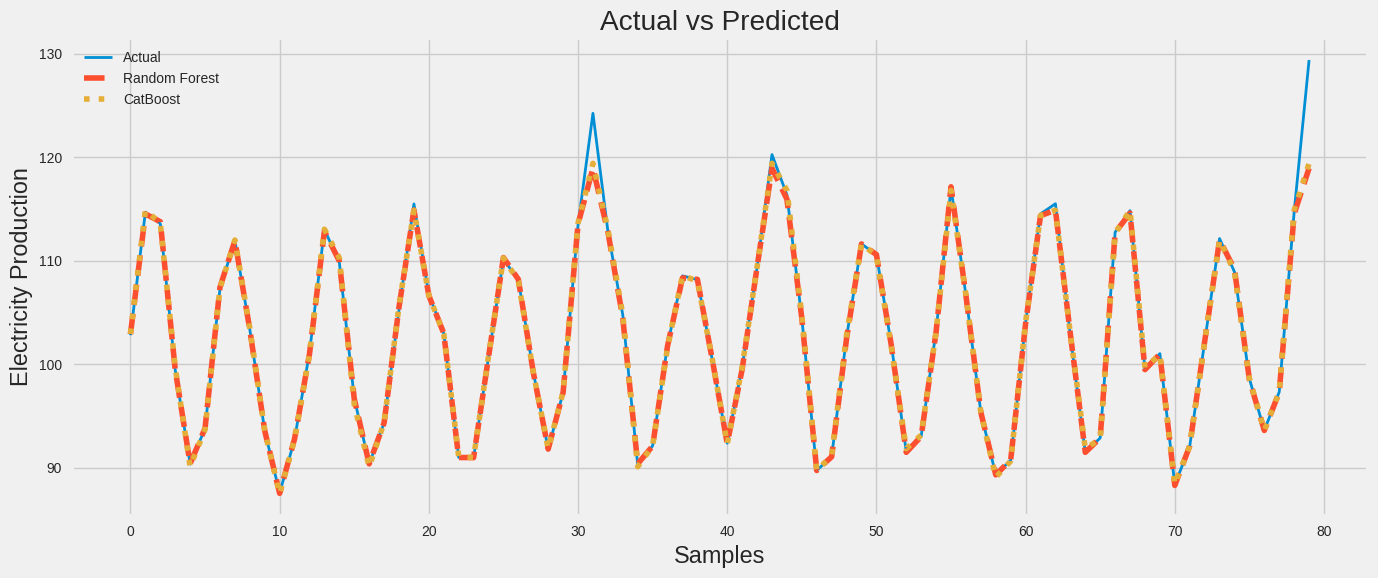

In [ ]:
def plot_predictions(y_true, y_rf, y_cb):
    plt.figure(figsize=(14, 6))
    plt.plot(y_true.values, label="Actual", linewidth=2)
    plt.plot(y_rf, label="Random Forest", linestyle="--")
    plt.plot(y_cb, label="CatBoost", linestyle=":")
    plt.title("Actual vs Predicted")
    plt.xlabel("Samples")
    plt.ylabel("Electricity Production")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predictions(y_test, rf_pred, cb_pred)


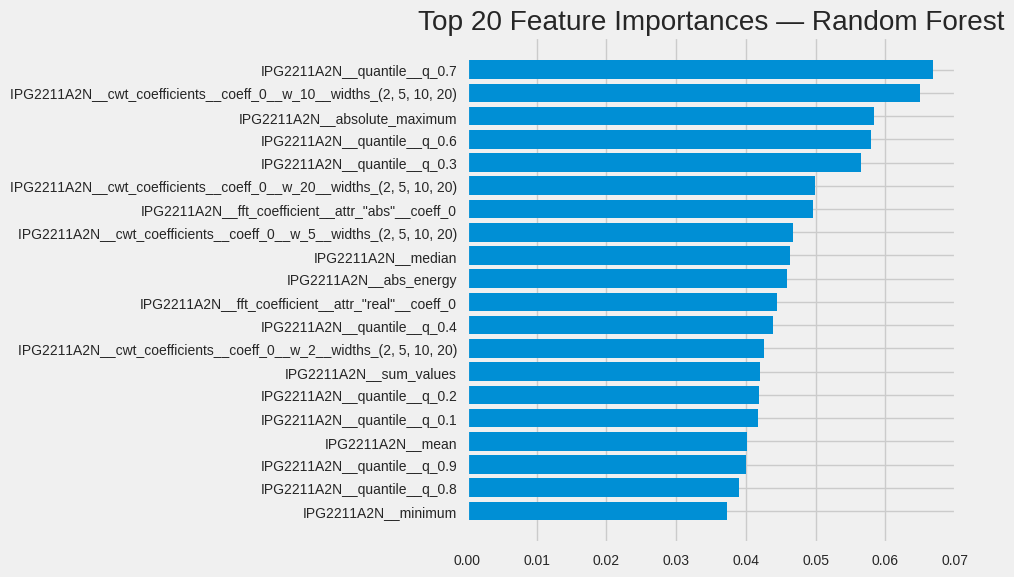

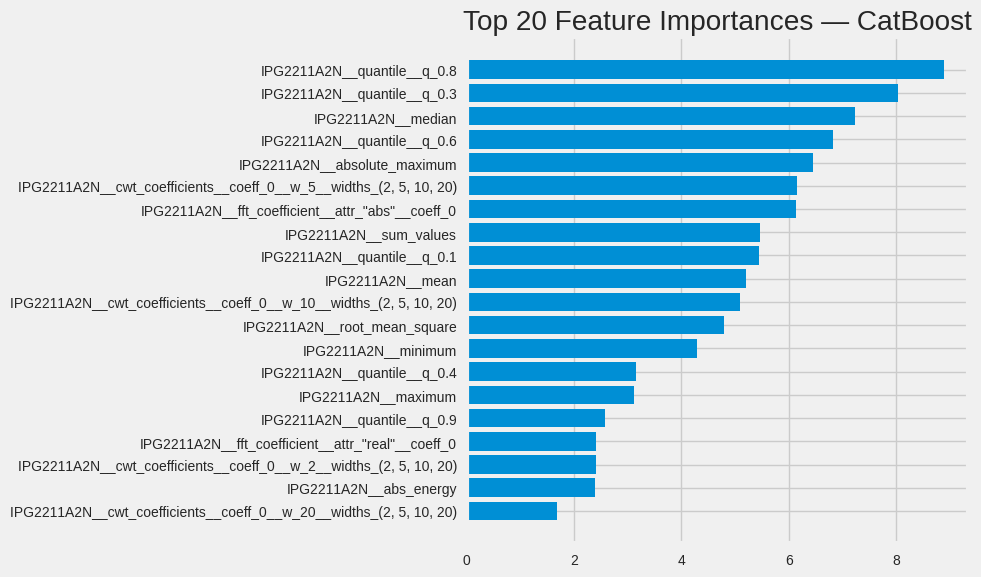

In [ ]:
def plot_feature_importance(importance, features, model_name, top_n=20):
    indices = np.argsort(importance)[-top_n:]
    plt.figure(figsize=(10, 6))
    plt.barh(range(top_n), importance[indices], align='center')
    plt.yticks(range(top_n), [features[i] for i in indices])
    plt.title(f"Top {top_n} Feature Importances — {model_name}")
    plt.tight_layout()
    plt.show()

# Для Random Forest
plot_feature_importance(rf.feature_importances_, X_filtered.columns, "Random Forest")

# Для CatBoost
plot_feature_importance(cb.get_feature_importance(), X_filtered.columns, "CatBoost")

## Общий вывод

Видим что после генерации данных с помощью библиотеки **tsfresh** метрики качества модели CatBoost намного выше, чем полученные с **pycaret Auto ML**.